In [38]:
#######################################################################
#오태우 코드

In [39]:
import pandas as pd
import re
import seaborn as sns  # 그래프를 그리기 위한 seaborn 라이브러리 임포트
import matplotlib.pyplot as plt  # 그래프 표시를 위한 pyplot 임포트

In [40]:
# 데이터셋 불러오기
df = pd.read_csv("data\\netflix_reviews.csv")

In [41]:
# 데이터프레임의 상단 5개 데이터 출력
print("상단 5개 데이터:")
print(df.head())

상단 5개 데이터:
                               reviewId           userName  \
0  411500b0-ac01-4071-badf-8aa8a45d0f29            Priya S   
1  5ef1c68e-9d84-4afb-8c58-829a554dc89b        angel dolla   
2  1fe7e31a-43d9-406e-94cd-549d019ec70f  CHRISTIAN SUMATRA   
3  c5cb0034-5395-417e-ad31-84c6ac79340b        Raghu Pathy   
4  43257f77-7b9e-40b8-ac56-c87ff3130619       Rebecka Todd   

                                             content  score  thumbsUpCount  \
0  With basic plan, Netflix can consider to allow...      2              0   
1                               Good app for series.      5              0   
2  Laging wala mga movies na magaganda potangina ...      1              0   
3  This app uses more data and it's asking withou...      1              0   
4  Since the latest update i am not able to load ...      1              0   

    reviewCreatedVersion                   at             appVersion  
0  8.137.0 build 4 50942  2024-10-22 14:16:52  8.137.0 build 4 50942  
1  8.

In [42]:
# 데이터프레임의 하단 5개 데이터 출력
print("\n하단 5개 데이터:")
print(df.tail())



하단 5개 데이터:
                                    reviewId       userName  \
117214  a760ead9-e7aa-4ed1-a651-5c37c3600dac  A Google user   
117215  4957f9e7-d7f4-4a52-9764-031cebcac83f   Captain Jeoy   
117216  9acf7586-7abf-4b50-8c50-3ede3b2a42c4       Suryansh   
117217  32870f7f-c461-4256-b602-75244ca60248  A Google user   
117218  dc1352e9-10a8-41ca-ab23-05d045b08e90     suraj soni   

                                                  content  score  \
117214  i really like it! there are so many movies and...      5   
117215   I love Netflix. I always enjoy my time using it.      5   
117216               Sound quality is very slow of movies      1   
117217  Rate is very expensive.. bcos we see netflix s...      1   
117218  this app is awesome for english movies ,series...      4   

        thumbsUpCount   reviewCreatedVersion                   at  \
117214              0                    NaN  2019-08-03 15:06:03   
117215              0   8.34.0 build 4 50250  2022-08-15 16:16

In [43]:
# 데이터프레임의 shape 출력
print("\nShape of the dataset:", df.shape)


Shape of the dataset: (117219, 8)


In [44]:
# 데이터프레임의 컬럼 출력
print("Columns in the dataset:", df.columns)

Columns in the dataset: Index(['reviewId', 'userName', 'content', 'score', 'thumbsUpCount',
       'reviewCreatedVersion', 'at', 'appVersion'],
      dtype='object')


In [45]:
# 전처리 함수
def preprocess_text(text):
    if isinstance(text, float):
        return ""
    text = text.lower()  # 대문자를 소문자로
    text = re.sub(r'[^\w\s]', '', text)  # 구두점 제거
    text = re.sub(r'\d+', '', text)  # 숫자 제거
    text = text.strip()  # 띄어쓰기 제외하고 빈 칸 제거
    return text

In [46]:
# 리뷰 데이터 전처리
df['cleaned_content'] = df['content'].apply(preprocess_text)

In [47]:
# 전처리된 데이터 확인
print("\n전처리된 상단 5개 데이터:")
print(df[['content', 'cleaned_content']].head())


전처리된 상단 5개 데이터:
                                             content  \
0  With basic plan, Netflix can consider to allow...   
1                               Good app for series.   
2  Laging wala mga movies na magaganda potangina ...   
3  This app uses more data and it's asking withou...   
4  Since the latest update i am not able to load ...   

                                     cleaned_content  
0  with basic plan netflix can consider to allow ...  
1                                good app for series  
2  laging wala mga movies na magaganda potangina ...  
3  this app uses more data and its asking without...  
4  since the latest update i am not able to load ...  


C:\Users\vulca\AppData\Local\Temp\ipykernel_7616\2737673158.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='score', data=df, palette='viridis')


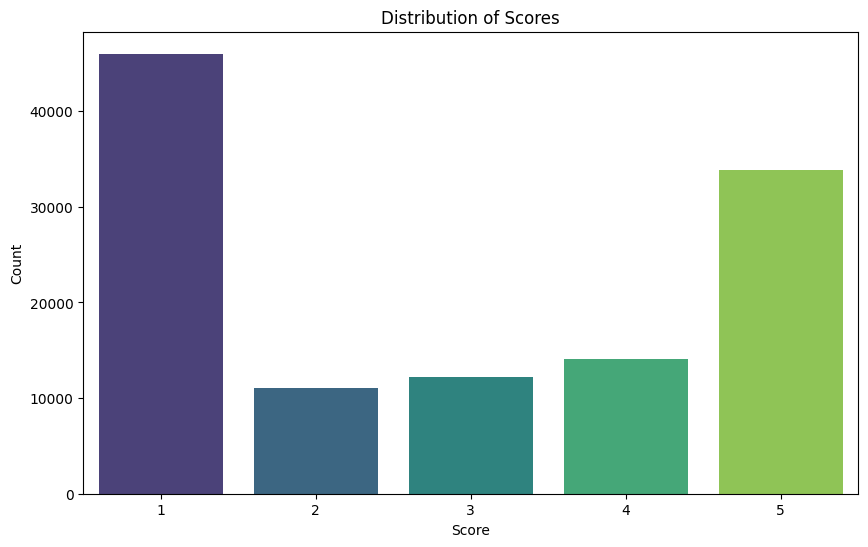

In [48]:
# 리뷰 점수 분포 시각화
plt.figure(figsize=(10, 6))
sns.countplot(x='score', data=df, palette='viridis')
plt.xlabel('Score')
plt.ylabel('Count')
plt.title('Distribution of Scores')
plt.xticks(rotation=0)
plt.show()

In [49]:
#######################################################################
#이승열 코드

In [50]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchtext.data.utils import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


import torch.nn.utils.rnn as rnn_utils

In [51]:
import torch

# GPU 사용 가능 -> True, GPU 사용 불가 -> False
print(torch.cuda.is_available())

device = torch.device('cuda:0') if torch.cuda.is_available() else torch.device('cpu')

True


In [52]:
# 1단계 데이터의 준비
reviews = df['cleaned_content'].tolist()
ratings = df['score'].tolist()

train_reviews, test_reviews, train_ratings, test_ratings = train_test_split(reviews,ratings,test_size=0.2,random_state=42)

In [53]:
# 2단계 데이터의 전처리
tokenizer = get_tokenizer("basic_english")


# 텍스트 파이프라인 정의
def text_pipeline(text):
    text = text.lower()  # 대문자를 소문자로
    text = re.sub(r'[^\w\s]', '', text)  # 구두점 제거
    text = re.sub(r'\d+', '', text)  # 숫자 제거
    text = text.strip()  # 띄어쓰기 제외하고 빈 칸 제거
    tokens = tokenizer(text)  # 토큰화
    indices = tokens_to_indices(tokens)  # 인덱스로 변환
    if len(indices) == 0:  # 빈 결과 방지
        indices = [vocab["<unk>"]]
    return indices



def build_vocab(texts):
    return build_vocab_from_iterator(map(tokenizer, texts), specials=["<unk>"])


# 어휘 사전 초기화
vocab = build_vocab(train_reviews)
vocab.set_default_index(vocab["<unk>"])

# 토큰을 인덱스로 변환하는 함수
def tokens_to_indices(tokens):
    return [vocab[token] for token in tokens]


def label_pipeline(label):
    return int(label)

In [54]:
# collate_batch 함수 정의
def collate_batch(batch):
    label_list, text_list, lengths = [], [], []
    for (_text, _label) in batch:
        label_list.append(_label)
        processed_text = torch.tensor(_text)
        text_list.append(processed_text)
        lengths.append(len(_text))
    padded_text = rnn_utils.pad_sequence(text_list, batch_first=True, padding_value=0).to(device)
    return padded_text, torch.tensor(label_list).to(device), torch.tensor(lengths).cpu()  # lengths는 CPU에 할당

In [55]:
# 데이터셋 클래스 정의
class ReviewDataset(Dataset):
    def __init__(self, reviews, ratings, text_pipeline, label_pipeline):
        self.reviews = reviews
        self.ratings = ratings
        self.text_pipeline = text_pipeline
        self.label_pipeline = label_pipeline

    def __len__(self):
        return len(self.reviews)

    def __getitem__(self, idx):
        review = self.text_pipeline(self.reviews[idx])
        rating = self.label_pipeline(self.ratings[idx])
        return torch.tensor(review),torch.tensor(rating)
    

# Label Encoder 정의 및 적용
unique_ratings = list(set(ratings))

label_encoder = LabelEncoder()
label_encoder.fit(unique_ratings)
encoded_train_ratings = label_encoder.transform(train_ratings)
encoded_test_ratings = label_encoder.transform(test_ratings)



# 데이터셋 및 데이터로더 초기화
train_dataset = ReviewDataset(train_reviews, encoded_train_ratings.tolist(), text_pipeline, label_pipeline)
test_dataset = ReviewDataset(test_reviews, encoded_test_ratings.tolist(), text_pipeline, label_pipeline)


# DataLoader 초기화
train_dataloader = DataLoader(train_dataset, batch_size=256, shuffle=True, collate_fn=collate_batch)
test_dataloader = DataLoader(test_dataset, batch_size=256, shuffle=False, collate_fn=collate_batch)


In [56]:
class Attention(nn.Module):
    def __init__(self, hidden_dim):
        super(Attention, self).__init__()
        self.attention = nn.Linear(hidden_dim * 2, 1, bias=False)

    def forward(self, lstm_output, final_hidden):
        attn_weights = torch.tanh(self.attention(lstm_output))
        attn_weights = torch.sum(attn_weights, dim=2).unsqueeze(2)
        attn_weights = torch.softmax(attn_weights, dim=1)
        context = attn_weights * lstm_output
        context = torch.sum(context, dim=1)
        return context


class LSTMModel(nn.Module):
    def __init__(self, vocab_size, embed_dim, hidden_dim, output_dim):
        super(LSTMModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim)
        self.lstm = nn.LSTM(embed_dim, hidden_dim, num_layers=2, batch_first=True, dropout=0.5, bidirectional=True)
        self.attention = Attention(hidden_dim)
        self.fc = nn.Linear(hidden_dim * 2, output_dim)


    def forward(self, text, lengths):  # lengths 인수를 추가
        embedded = self.embedding(text)
        packed_input = nn.utils.rnn.pack_padded_sequence(embedded, lengths, batch_first=True, enforce_sorted=False)
        packed_output, (hidden, cell) = self.lstm(packed_input)
        lstm_output, _ = nn.utils.rnn.pad_packed_sequence(packed_output, batch_first=True)
        attn_output = self.attention(lstm_output, torch.cat((hidden[-2,:,:], hidden[-1,:,:]), dim=1))
        return self.fc(attn_output)

In [57]:
# 하이퍼파라미터 정의
VOCAB_SIZE = len(vocab)  # 어휘 사전의 크기
EMBED_DIM = 64  # 임베딩 차원 크기
HIDDEN_DIM = 128  # LSTM 히든 레이어 크기
OUTPUT_DIM = len(set(ratings))  # 예측할 점수의 개수


# 모델 초기화
model = LSTMModel(VOCAB_SIZE, EMBED_DIM, HIDDEN_DIM, OUTPUT_DIM)
model.to(device)


# 손실 함수와 옵티마이저 정의
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [58]:
# 모델 학습
num_epochs = 10  # 에포크 수 설정
for epoch in range(num_epochs):
    model.train()  # 모델을 학습 모드로 전환
    epoch_loss = 0
    for reviews, ratings, lengths in train_dataloader:
        reviews, ratings = reviews.to(device), ratings.to(device)  # lengths는 CPU에 남겨둠
        optimizer.zero_grad()
        outputs = model(reviews, lengths)  # lengths는 CPU 텐서로 전달
        loss = criterion(outputs, ratings)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss/len(train_dataloader):.4f}')
print('Finished Training')


C:\Users\vulca\AppData\Local\Temp\ipykernel_7616\1035331568.py:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  processed_text = torch.tensor(_text)


Epoch [1/10], Loss: 1.0160
Epoch [2/10], Loss: 0.8731
Epoch [3/10], Loss: 0.8083
Epoch [4/10], Loss: 0.7544
Epoch [5/10], Loss: 0.7174
Epoch [6/10], Loss: 0.6979
Epoch [7/10], Loss: 0.6844
Epoch [8/10], Loss: 0.6696
Epoch [9/10], Loss: 0.6745
Epoch [10/10], Loss: 0.6767
Finished Training


In [59]:
# 예측 함수 
def predict_review(model, review):
    model.eval()  # 모델을 평가 모드로 전환
    with torch.no_grad():  # 그라디언트 계산 중지
        tensor_review = torch.tensor(text_pipeline(review)).unsqueeze(0).to(device) # 리뷰를 텐서로 변환하고 배치 차원 추가
        print(tensor_review)
        length = torch.tensor([len(text_pipeline(review))]).cpu()  # 길이 텐서 생성
        print(length)
        output = model(tensor_review, length)  # 모델 예측 값
        prediction = output.argmax(1).item()  # 가장 높은 확률의 클래스를 예측
        return label_encoder.inverse_transform([prediction])[0]  # 예측된 클래스를 원래 점수로 변환

In [60]:
new_review = "I hate this app"
predicted_score = predict_review(model, new_review)
print(f'Predicted Score: {predicted_score}')

tensor([[  2, 303,  15,   9]], device='cuda:0')
tensor([4])
Predicted Score: 1


In [61]:
# 전처리 확인 예시
example_texts = ["I hate this app", "This app is great but has some bugs", "I love this"]
for text in example_texts:
    processed = text_pipeline(text)
    print(f'Text: {text}\nProcessed: {processed}\n')

Text: I hate this app
Processed: [2, 303, 15, 9]

Text: This app is great but has some bugs
Processed: [15, 9, 6, 44, 12, 49, 72, 600]

Text: I love this
Processed: [2, 38, 15]



In [62]:
#######################################################################
#정재석 코드

In [63]:
# 텍스트 전처리와 자연어 처리를 위한 라이브러리
import nltk
from textblob import TextBlob

# 토픽 모델링을 위한 라이브러리
import gensim
from gensim import corpora
from gensim.utils import simple_preprocess

# 감성 분석을 위한 함수
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

In [64]:
df['sentiment'] = df["cleaned_content"].apply(get_sentiment)  # (DIY) apply를 사용하여 감성 분석을 해보세요. 필수 텍스트가 전처리되어있어야 합니다.
# df에 sentiment 값을 적용을 먼저 하시고, 아래와 같이 긍정과 부정을 분류하세요.
df['sentiment_label'] = df['sentiment'].apply(lambda x: 'positive' if x > 0.1 else ('negative' if x < -0.1 else 'neutral'))


In [66]:
df[['cleaned_content', 'score', 'sentiment_label']]

cleaned_content  score  \
0       with basic plan netflix can consider to allow ...      2   
1                                     good app for series      5   
2       laging wala mga movies na magaganda potangina ...      1   
3       this app uses more data and its asking without...      1   
4       since the latest update i am not able to load ...      1   
...                                                   ...    ...   
117214  i really like it there are so many movies and ...      5   
117215     i love netflix i always enjoy my time using it      5   
117216               sound quality is very slow of movies      1   
117217  rate is very expensive bcos we see netflix sun...      1   
117218  this app is awesome for english movies series ...      4   

       sentiment_label  
0              neutral  
1             positive  
2              neutral  
3             positive  
4              neutral  
...                ...  
117214        positive  
117215        positive  
117216         neutral  
117217        negative  
117218        positive  

[117219 rows x 3 columns]

In [ ]:
#######################################################################
#서승화

In [67]:
from wordcloud import WordCloud, STOPWORDS

In [68]:
#불용어를 먼저 제거
stopwords = set(STOPWORDS)
stopwords.update(['netflix', 'movie', 'show', 'time', 'app', 'series', 'phone', 'watch', 'name', 'see', 'go', 'goes', 'dtype', 'appp', 'cant', 'download', 'movies', 'use', 'now', 'evev', 'shows'])

In [72]:
df_negative = df.groupby('sentiment_label').get_group('negative')  #sentiment_label로 그룹화 한 후 get_group으로 negative만 추출

In [73]:
df_negative['content']

7         This is a very useless appp because I can't us...
16        When you go to watch a movie on your phone it ...
22                                                worst app
24        It is not able to watch. I can not see it, I d...
25        To expensive for what little entertainment the...
                                ...                        
117180    It won't let me sign in! So not a good time be...
117191    Add the other beyblade shows like evolution , ...
117194    This platform keeps getting worse and worse. I...
117213    Everytime I watch a show it goes so dark so I ...
117217    Rate is very expensive.. bcos we see netflix s...
Name: content, Length: 20126, dtype: object

In [78]:
negative_reviews = str(df_negative['content'])
df_positive = df.groupby('sentiment_label').get_group('positive')

In [79]:
#출력값이 모호해서 다른 방법으로 다시 해보자
join_negative = ''.join(df_negative['content'])  #''.join() ''안의 구분자를 넣어 ()안의 리스트의 사이에 넣어서 출력.
join_negative

'This is a very useless appp because I can\'t use it without any subscription , so it is useless for meWhen you go to watch a movie on your phone it is way to dark that you can\'t even see the movie. There are no settings that I can find to correct.worst appIt is not able to watch. I can not see it, I don\'t know what is wrongTo expensive for what little entertainment they provideVery poor app koye be subscription mot karna mera 469 chalagya faltu me Subscription nahi milaI\'m unable to open the app. I tried uninstalling and reinstalling the app.I have issues with the Netflix app, why\'s that the movie is freezing or blinking then black out. What is the cause? I have updated the Netflix but still...Horrible selection expensive lots of ads wouldn\'t recommend at all they now lock many of the movies unless u pay extra and they\'re selection is the worst out of any streaming platform dont waste ur time with themvery bad👎👎 experience 😡🤮🤮🤮ExpensiveWorstNot interestedUnable to block foreign 

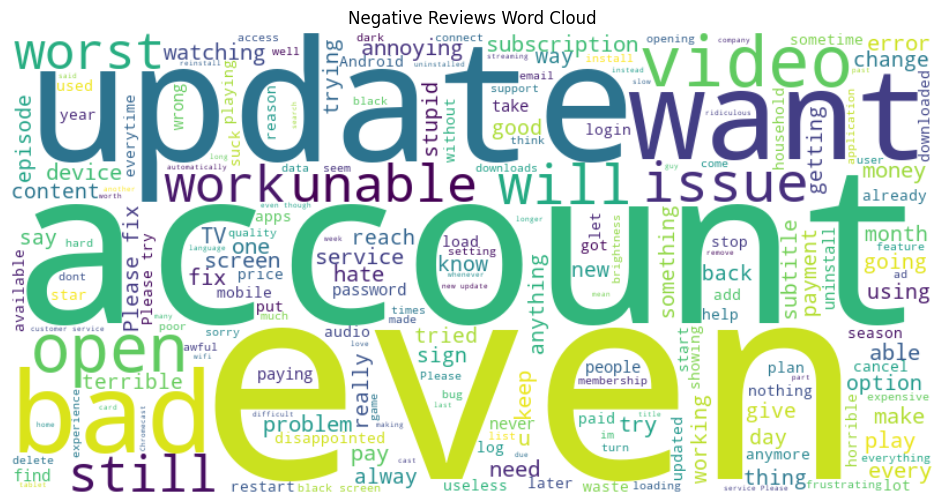

In [81]:
negative_reviews = join_negative
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords).generate(negative_reviews)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Reviews Word Cloud')
plt.show()

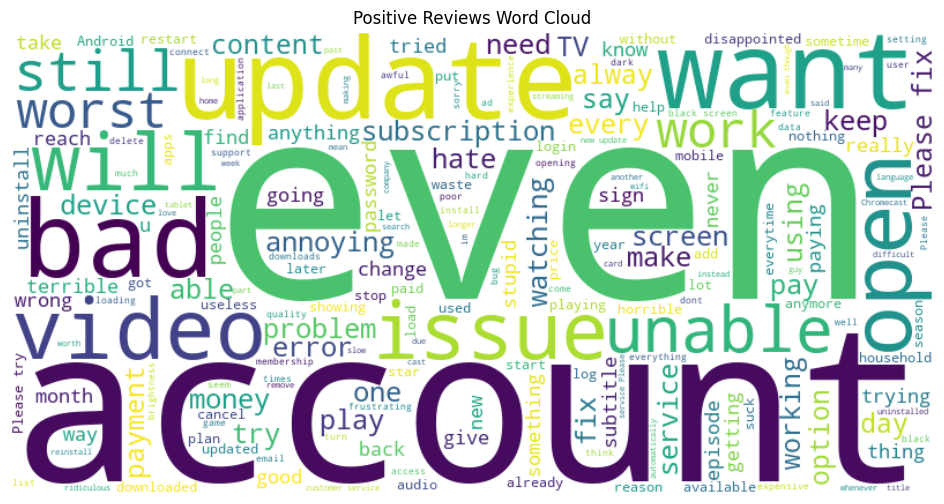

In [82]:
df_positive = df.groupby('sentiment_label').get_group('positive')
positive_reviews = ''.join(df_positive['content'])
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords).generate([positive_reviews])

plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Reviews Word Cloud')
plt.show()